
# EE 461P: Data Science Principles
# Assignment 3
## Total points: 65
## Due: Tuesday, March 10th, submitted via Canvas by 11:59 pm

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Alex Li (al45532)
2. Zander Tedjo (zbt86)

# Question 1 - Regression using MLP (30 pts)

We will use the same dataset used in Homework 1 and try to design a MLP model for the same. 

Use the following code below to import the dataset.

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
warnings.filterwarnings("ignore")


random_num = 42

In [2]:
df = pd.read_csv('train.csv')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

For the below questions, use seed for random number as 42. You will need this seed for all instances of `train_test_split()` and `MLPRegressor()`.

a. **(4 pts)** Using Multi-layer Perceptron regressor, fit a regression model with `alpha=0` on all the feature variables using the entire dataset. Report the total of number of weights present in the weight matrix (obtained using `model.coefs_`) and evaluate the model using mean squared error (MSE). An example is shown in [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

b. **(6 pts)** Split the data into a training set and a test set, using the train_test_split with `test_size = 0.25` and `random_state = 42`. Fit an MLP using the training set with `alpha=0` and `max_iter=1000`. Evaluate the trained model using the training set and the test set, respectively. Compare the two MSE values thus obtained. Give one reason behind the change in loss value.

c. **(5 pts)** Calculate the pearson correlation matrix of the independent variables in the training set. Show the correlation matrix as a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) without annotations. Report the two features that are most positively and negatively correlated (excluding the same features) from the correlation matrix. [Sample code](https://stackoverflow.com/a/41453817)

d. **(6 pts)** Run MLPRegressor like part (a) but this time, use different values for alpha, which is the L2 penalty (regularization term) parameter. Take at least 10 values of alpha within the range of [0, 0.001]. Plot the MSE for various values of alpha. Explain the value of alpha that gives the minimum MSE. What does this mean?.

In [3]:
# Answer 1a
print("Answer 1a\n")

model = MLPRegressor(random_state=42, alpha=0, max_iter=1000)
model.fit(X, Y)
coefs = model.coefs_

y_pred = model.predict(X)
mse = mean_squared_error(Y, y_pred)


print("First layer has ", len(coefs[0]), " weights")
print("Second layer has ", len(coefs[1]), " weights")
print("Total number of weights is ", (len(coefs[0]) + len(coefs[1])))

print()
print("MSE ", mse)

Answer 1a

First layer has  19  weights
Second layer has  100  weights
Total number of weights is  119

MSE  2116661777.407564


In [4]:
# Answer 1b
print("Answer 1b\n")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model = MLPRegressor(random_state=42, alpha=0, max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE train ", mse_train)
print("MSE test ", mse_test)

print()

print("The MSE train value increased slightly because it had less data to train on")
print("The MSE test value improved because the model overfitted less")

Answer 1b

MSE train  2200124929.2119737
MSE test  1866181108.1068006

The MSE train value increased slightly because it had less data to train on
The MSE test value improved because the model overfitted less


In [5]:
# Answer 1c
print("Answer 1c\n")
import seaborn as sns

corr = X.corr()
ax = sns.heatmap(corr)

max_corr = -1000
min_corr = 1000
max_features = []
min_features = []

labels = corr.columns.values

for r in range(0, corr.shape[0]):
    for c in range(0, r):
        val = corr.iloc[r,c]
        if(val > max_corr):
            max_corr = val
            max_features = [r,c]
        if(val < min_corr):
            min_corr = val
            min_features = [r,c]

print("Most positive correlation")
print(labels[max_features[0]],labels[max_features[1]], max_corr)

print()

print("Most negative correlation")
print(labels[min_features[0]],labels[min_features[1]], min_corr)
     

Answer 1c

Most positive correlation
GarageArea GarageCars 0.8824754142814603

Most negative correlation
1stFlrSF MSSubClass -0.2517583518783804


Answer 1d



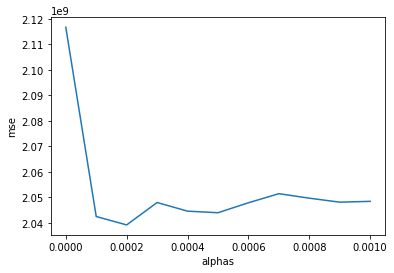

Min MSE occurs when alpha is 0.0002
When alpha is 0.0002, there is a good amount of regularization and limit on complexity, so the model will resist overfitting and be closer to the compelxity of the data.


In [6]:
# Answer 1d
print("Answer 1d\n")
import matplotlib.pyplot as plt
%matplotlib inline

alphas = np.linspace(0, 0.001, 11)
mse_list = []

for a in alphas:
    model = MLPRegressor(random_state=42, alpha=a, max_iter=1000)
    model.fit(X, Y)

    y_pred = model.predict(X)
    mse = mean_squared_error(Y, y_pred)
    mse_list.append(mse)

plt.plot(alphas, mse_list)
plt.xlabel('alphas')
plt.ylabel('mse')
plt.show()

print("Min MSE occurs when alpha is 0.0002")
print("When alpha is 0.0002, there is a good amount of regularization and limit on complexity, so the model will resist overfitting and be closer to the compelxity of the data.")


# Question 2 - Decision Tree Classifier (20 pts)
**Customer Eligibility for Deposits**

Predict if a customer will subscribe (yes/no) to a fixed deposit, by building a classification model using Decision Tree.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [8]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'primary', 'secondary','tertiary')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: account balance

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - day_of_month : 1,2....31

11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**All the pre-processing is done where the categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [9]:
# Make a copy for parsing
bank_data = bank.copy()

In [10]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [11]:
#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

In [12]:
# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [13]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [14]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,3,5,10 and max depth using gini and entropy criterion; report the train and test error.

b. **(2 pts)** Explain how the train and test accuracy vary as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve.

In [15]:
#Answer 2a
print("Answer 2a\n")

depths = [2,3,5,10, None]

for d in depths:
    print("Depth", d)
    
    # Gini
    clf = DecisionTreeClassifier(criterion = "gini", max_depth = d, random_state = 0)
    clf.fit(X_train, Y_train)

    train_error = clf.score(X_train, Y_train)
    test_error = clf.score(X_test, Y_test)

    print("Gini prediction:")
    print("train score", train_error)
    print("test score", test_error)

    print()
    
    # Entropy
    clf = DecisionTreeClassifier(criterion = "entropy", max_depth = d, random_state = 0)
    clf.fit(X_train, Y_train)

    train_error = clf.score(X_train, Y_train)
    test_error = clf.score(X_test, Y_test)

    print("Entropy prediction:")
    print("train score", train_error)
    print("test score", test_error)
    
    print("\n")


Answer 2a

Depth 2
Gini prediction:
train score 0.7285250307985217
test score 0.7268248992386923

Entropy prediction:
train score 0.7119498264083324
test score 0.7089117778772951


Depth 3
Gini prediction:
train score 0.770411020271027
test score 0.7572772055530677

Entropy prediction:
train score 0.7623474073244484
test score 0.7568293775190327


Depth 5
Gini prediction:
train score 0.7976257139657297
test score 0.7760859829825347

Entropy prediction:
train score 0.7998656064508903
test score 0.7783251231527094


Depth 10
Gini prediction:
train score 0.8634785530294545
test score 0.7859381997313032

Entropy prediction:
train score 0.8500391981184903
test score 0.7890729959695477


Depth None
Gini prediction:
train score 1.0
test score 0.7348858038513211

Entropy prediction:
train score 1.0
test score 0.7196596506941334




## Answer 2b

Train score will continue to increase as depth increases, since the model will overfit and attempt to memorize the data.

For Gini and Entropy, the best test score is reached when depth=10. So the test score improves up to a certain point, then dereases from there. This is due to increasing the complexity of the model, and after the optimal complexity, the model will overfit the training data.

Answer 2c

Most important features:
duration 0.849306123902405
poutcome_success 0.15069387609759496


[Text(167.4, 181.2, 'X[2] <= 206.5\ngini = 0.499\nsamples = 8929\nvalue = [4700, 4229]'),
 Text(83.7, 108.72, 'X[29] <= 0.5\ngini = 0.327\nsamples = 3612\nvalue = [2867, 745]'),
 Text(41.85, 36.23999999999998, 'gini = 0.273\nsamples = 3380\nvalue = [2828, 552]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.28\nsamples = 232\nvalue = [39, 193]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 441.5\ngini = 0.452\nsamples = 5317\nvalue = [1833, 3484]'),
 Text(209.25, 36.23999999999998, 'gini = 0.5\nsamples = 2762\nvalue = [1340, 1422]'),
 Text(292.95, 36.23999999999998, 'gini = 0.311\nsamples = 2555\nvalue = [493, 2062]')]

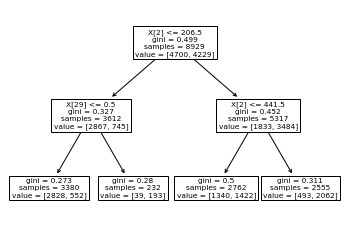

In [16]:
#Answer 2c
print("Answer 2c\n")

from sklearn import tree

clf = DecisionTreeClassifier(criterion = "gini", max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)

# Most important features
labels = X_train.columns.values
feature_importances = clf.feature_importances_
n = len(labels)

print("Most important features:")
for i in range(0,n):
    importance = feature_importances[i]
    if(importance > 0):
        print(labels[i], importance)

#Plot tree
tree.plot_tree(clf)

Answer 2d

Test accuracy:  0.7572772055530677
Test auc:  0.7513829239653202


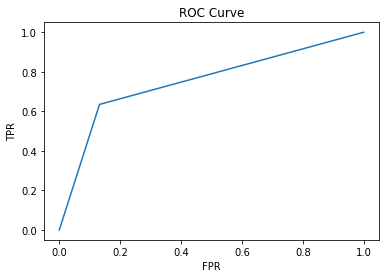

In [17]:
#Answer 2d
print("Answer 2d\n")

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


clf = DecisionTreeClassifier(criterion = "gini", max_depth = 3, random_state = 0)
clf.fit(X_train, Y_train)
y_test_pred = clf.predict(X_test)

test_accuracy = accuracy_score(Y_test, y_test_pred)
test_auc = roc_auc_score(Y_test, y_test_pred)

print("Test accuracy: ", test_accuracy)
print("Test auc: ", test_auc)


# Plot ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
#roc_auc = auc(fpr, tpr) # equals roc_auc()

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

# Question 3 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 1 if the customer buys and 2 if he/she does not. For each customer, you are given two features, $x_1$ is the salary per hour and $x_2$ is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian for both classes. The mean salary and age of the people who do buy a TV is 30 and 39 respectively and that of those who don't is 16 and 20. Also assume that covariances of these two groups are given by $I$ (for "buy class") and $4I$ respectively, where $I$ is the identity matrix. Further, your sales data suggests that only 1 in 5 people actually buy a TV. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c. (3pts) Write a script to sample 100 customers from class (C = 1) and correspondingly from class 2, under the assumed distribution and the estimated parameters and create a scatter plot. Plot the decision boundary you obtained in  part (b) on the same plot. (You can hardcode the co-efficient values for the deicision boundary)

### Part A
Class conditional likelihood - Probability of observing a value, given that it belongs to a certain class

Class priors - an estimate of the probability that randomly sampling an instance from a population will yield the given class

Posterior probability - The probability of a class given observed input features

Posterior probability = (Class conditional likelihood)(Class priors)/probability density 
$$P(w_j|x) = \frac{p(x|w_j)P(w_j)}{p(x)}$$

### Part B

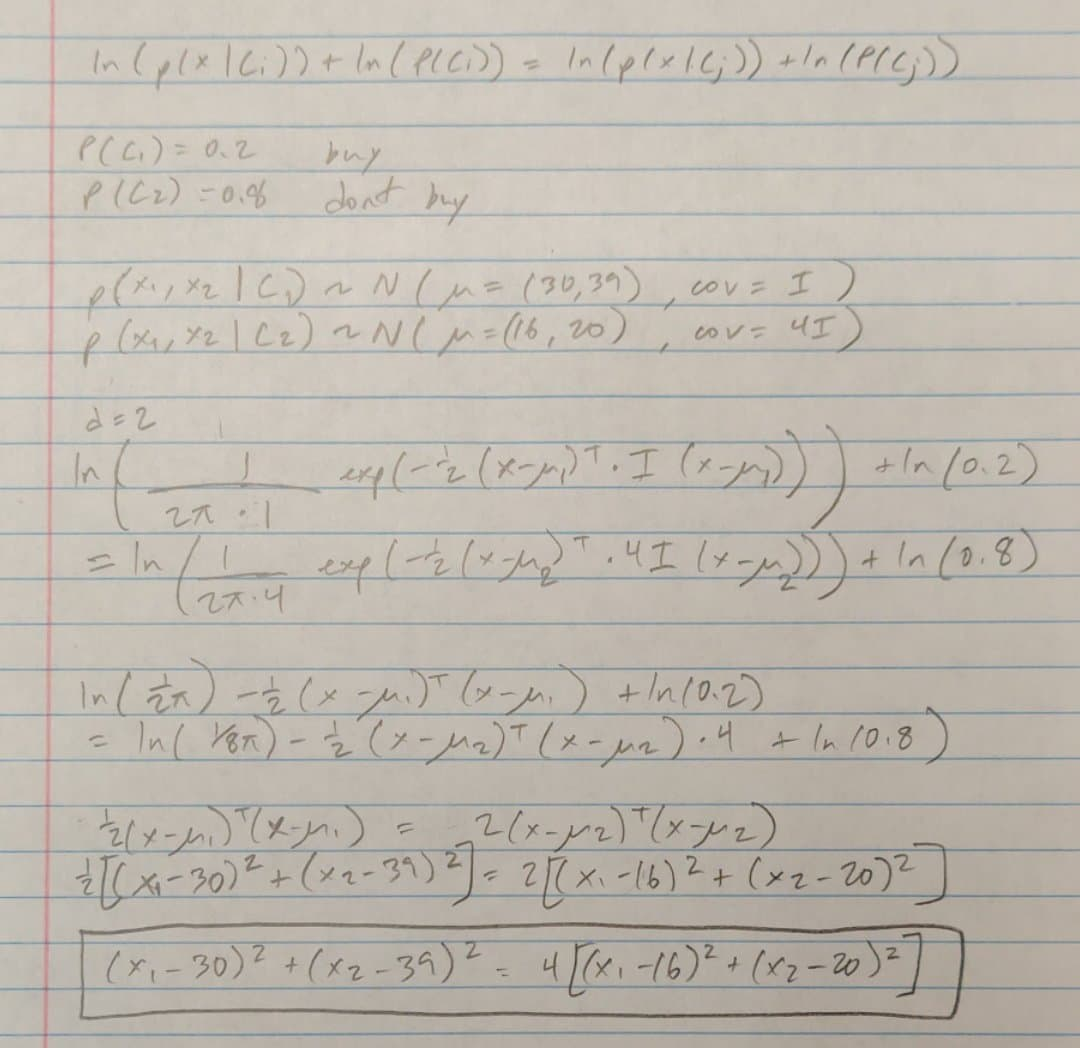

Answer 3c



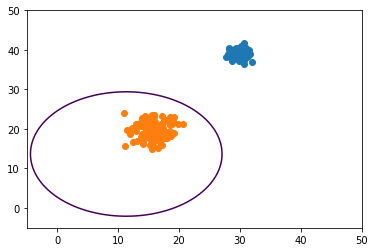

In [41]:
# Answer 3c
print("Answer 3c\n")

# class 1 = buy, class 2 = no buy

mean1 = [30, 39]
cov1 = [[1, 0], [0, 1]]

mean2 = [16, 20]
cov2 = [[4, 0], [0, 4]]


x1, y1 = np.random.multivariate_normal(mean1, cov1, size=100).T
plt.scatter(x1, y1)

x2, y2 = np.random.multivariate_normal(mean2, cov2, size=100).T
plt.scatter(x2, y2)


# Plot boundary
x = np.linspace(-5, 50, 500)
y = np.linspace(-5, 50, 500)
x, y = np.meshgrid(x, y)

plt.contour(x, y, ((x-30)**2 + (y-39)**2 - 4*(x-16)**2 - 4*(y-20)**2), [0] )


# Question 4 - Asymmetric Cost Function (5pts)

Consider the loss matrix below specified for a certain 3-class problem:


|     .  |  . | $C_1$ |   $C_2$  | $C_3$ |
|-------|-------|-------|:--------:|-------|
| .    | $C_1$ | 3     |     4    | 5     |
| Truth | $C_2$ | 8     |     0    | 2     |
| .     | $C_3$ | -6    |     0    | -8    |
|  .   |   .   |   .   | Decision |       |



For what range of values of $P(C_1|x)$ will you declare x to belong to Class 1 if your goal is to minimize the expected loss rather than minimizing misclassification error? To make this problem simpler, assume that  $P(C_2|x) = P(C_3|x)$ for all x.

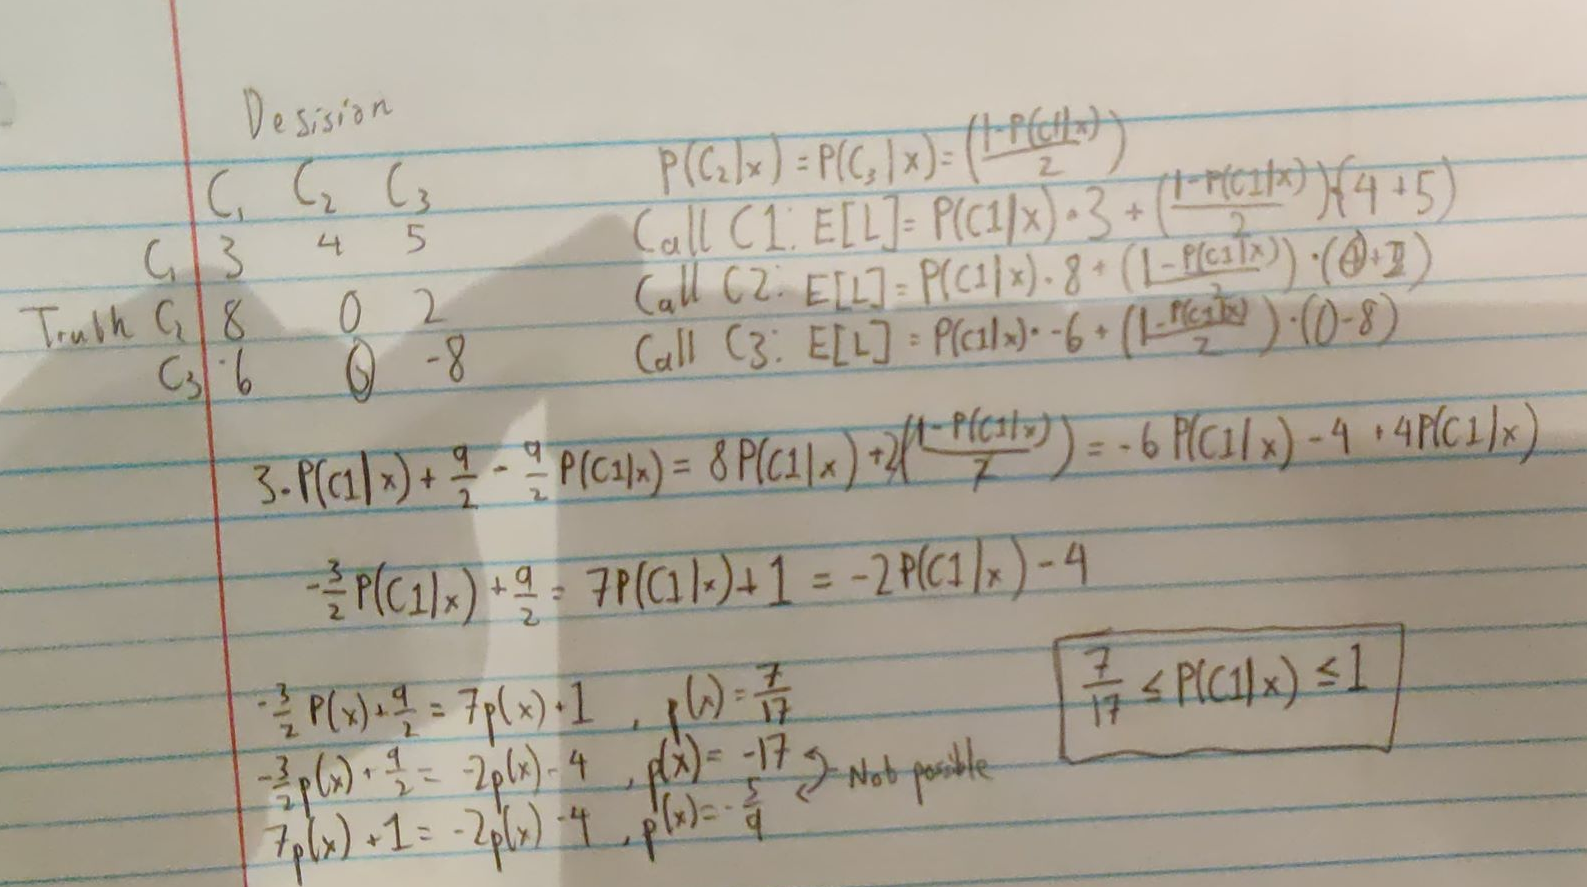